In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress = True)

# 第十章

## 零、练一练

```{admonition} 练一练
请尝试在pd.Timestamp()中传入其他格式的时刻字符串，如：“20210901”、“2021-09-01”等，体会该构造方法的灵活性。
```

In [2]:
pd.Timestamp("20210901")

Timestamp('2021-09-01 00:00:00')

In [3]:
pd.Timestamp("2021-09-01")

Timestamp('2021-09-01 00:00:00')

```{admonition} 练一练
请分别将如下格式的时间戳列表转为正确的时序Series格式。
- ["0901 2021", "0902 2021", "0903 2021"]
- ["21-9-1 8-35-50", "21-9-2 9-25-45"]
```

- 1

In [4]:
bad_format = ["0901 2021", "0902 2021", "0903 2021"]
temp = pd.to_datetime(bad_format, format='%m%d %Y')
temp

DatetimeIndex(['2021-09-01', '2021-09-02', '2021-09-03'], dtype='datetime64[ns]', freq=None)

In [5]:
bad_format = ["2021-9-1 8-35-50", "2021-9-2 9-25-45"]
temp = pd.to_datetime(bad_format, format='%Y-%m-%d %H-%M-%S')
temp

DatetimeIndex(['2021-09-01 08:35:50', '2021-09-02 09:25:45'], dtype='datetime64[ns]', freq=None)

```{admonition} 练一练
Timestamp对象上定义了1个value属性，其返回的整数值代表了从1970年1月1日零点到给定时间戳相差的纳秒数。同时，pd.Timestamp也支持通过这个整数值来构造时间戳，即它们之间一一对应。请利用这个特性设计1个随机生成给定日期区间内日期序列的函数random_dates(time1, time2, n)，其中time1、time2和n分别指区间左边界、区间右边界和序列元素个数。
```

In [6]:
def random_dates(time1, time2, n):
    t1 = pd.Timestamp(time1).value / 1e9
    t2 = pd.Timestamp(time2).value / 1e9
    d = np.random.randint(t1, t2+1, n)
    return pd.to_datetime(d * 1e9)
random_dates("20200101", "20200105", 4)

DatetimeIndex(['2020-01-04 12:55:11', '2020-01-02 08:45:52',
               '2020-01-02 18:18:35', '2020-01-04 12:28:57'],
              dtype='datetime64[ns]', freq=None)

```{admonition} 练一练
在上述构造的Series中，按如下要求选出子序列：
- 选出每月前十天中的工作日
- 选出每月的1号、11号和21号以及每月的最后5天
```

In [7]:
s = pd.Series(
    np.random.randint(2,size=365),
    index=pd.date_range('2021-01-01','2021-12-31'))
idx = pd.Series(s.index).dt
s.head()

2021-01-01    1
2021-01-02    1
2021-01-03    0
2021-01-04    0
2021-01-05    1
Freq: D, dtype: int32

- 1

In [8]:
res = s[(idx.day<=10).values]
res.head()

2021-01-01    1
2021-01-02    1
2021-01-03    0
2021-01-04    0
2021-01-05    1
dtype: int32

- 2

In [9]:
res = s[((idx.daysinmonth-idx.day<=4)|(idx.day%10==1)).values]
res.head()

2021-01-01    1
2021-01-11    1
2021-01-21    0
2021-01-27    1
2021-01-28    0
dtype: int32

```{admonition} 练一练
与时间戳序列类似，时间差序列也可以使用max()、min()和mean()来得到最大时间差、最小时间差以及平均时间差，请基于learn_pandas数据集中的Time_Record列（学生的跑步体侧成绩）解决如下问题：
- 最慢的学生花费的秒数是最快学生的几倍？
- 在跑步时间超过及格线4分30秒的学生中（即不及格的学生中），每10秒做一次划分（区间左闭右开），请计算每一个区间（4分30秒至4分40秒、4分40秒至4分50秒、...）的学生人数。
```

- 1

In [10]:
df = pd.read_csv("data/learn_pandas.csv")
df.Time_Record = pd.to_timedelta(df.Time_Record)
df.Time_Record.dt.seconds.max() / df.Time_Record.dt.seconds.min()

1.5592417061611374

- 2

In [11]:
s = df.Time_Record[df.Time_Record > pd.Timedelta("4m30s")].reset_index(drop=True)
pd.to_timedelta((s // pd.Timedelta("10s") * 10), unit="s").value_counts().sort_index()

0 days 00:04:30    15
0 days 00:04:40    12
0 days 00:04:50    16
0 days 00:05:00    18
0 days 00:05:10    20
0 days 00:05:20    24
Name: Time_Record, dtype: int64

```{admonition} 练一练
将上述的pd.offsets.BDay(30)改为pd.offsets.BDay(12)，请问2021-09-06和2021-09-05经过如上的操作后结果仍然保持不一致吗？请说明理由。
```

由于两个日期过了12个工作日之后，都是九月二十二日，因此它们的结果一致：

In [12]:
pd.Timestamp('20210906') + pd.offsets.BDay(12) - pd.Timestamp('20210906')

Timedelta('16 days 00:00:00')

In [13]:
pd.Timestamp('20210905') + pd.offsets.BDay(12) - pd.Timestamp('20210905')

Timedelta('16 days 00:00:00')

```{admonition} 练一练
请利用10.1.4节介绍的索引方法，构造与上述bdate_range()结果一致的DatetimeIndex。（练习重点在于使用dt对象和布尔序列的组合，来模拟weekmask和holidays的筛选过程）
```

In [14]:
s = pd.Series(pd.date_range(start='20210920', end='20211015'))
s = s[((s>pd.Timestamp("20211007"))|(s<pd.Timestamp("20211001"))).values]
s = s[s.dt.dayofweek.between(2,5).values].values
s = pd.to_datetime(s)
s

DatetimeIndex(['2021-09-22', '2021-09-23', '2021-09-24', '2021-09-25',
               '2021-09-29', '2021-09-30', '2021-10-08', '2021-10-09',
               '2021-10-13', '2021-10-14', '2021-10-15'],
              dtype='datetime64[ns]', freq=None)

```{admonition} 练一练
在日期偏置中我们介绍了CDay，它能够对节假日和部分星期进行筛选。假设现在需要对所有周二以及每月的第一个周末进行过滤，从而进行7个Custom Day的滑窗操作，请仿照上面的例子给出解决方案。
```

In [15]:
s = pd.Series(np.random.randint(0, 10, 365),
              index=pd.date_range("20210101","20211231"))
s = s.sample(250, random_state=999).sort_index()

In [16]:
idx = pd.Series(s.index).dt
s_cday = s[((idx.dayofweek!=1)&((idx.day>7)|((idx.day<7)&(idx.day_of_week<5)))).values]
cday_sum = s_cday.rolling(7, min_periods=1).sum()
result = cday_sum.reindex(s.index).ffill()
result.head(8)

2021-01-01     1.0
2021-01-02     1.0
2021-01-04     2.0
2021-01-05     2.0
2021-01-07     2.0
2021-01-08     7.0
2021-01-09    12.0
2021-01-11    17.0
dtype: float64

```{admonition} 练一练
对上述数据每天按照0点至12点、12点至24点进行分组极差计算。
```

In [17]:
np.random.seed(0)
idx = pd.date_range("20210901", "20210902 23:59:59", freq="90min")
s = pd.Series(np.random.rand(idx.shape[0]), index=idx)

In [18]:
s.resample("12H").apply(lambda x: x.max()-x.min())

2021-09-01 00:00:00    0.468118
2021-09-01 12:00:00    0.892627
2021-09-02 00:00:00    0.958400
2021-09-02 12:00:00    0.826394
Freq: 12H, dtype: float64

```{admonition} 练一练
对于merge_asof()而言，只需要保证键是有序且可比较的即可，因此整数和浮点的模糊匹配也是可以进行的。请举出1个非时序的例子来说明参数选择对合并结果的影响。
```

In [19]:
df1 = pd.DataFrame({
    "A": [2,4,6,8,10],
})
df1

,A
0,2
1,4
2,6
3,8
4,10


In [20]:
df2 = pd.DataFrame({
    "A": [1,3,5,6,9],
    "B": range(100,105)
})
df2

,A,B
0,1,100
1,3,101
2,5,102
3,6,103
4,9,104


In [21]:
pd.merge_asof(df1, df2, on="A", direction="backward")

,A,B
0,2,100
1,4,101
2,6,103
3,8,103
4,10,104


## 一、太阳辐射数据的时序分析

现有1份关于太阳辐射的数据集：

In [22]:
df = pd.read_csv('data/ch10/solar.csv',
                 usecols=['Data','Time','Radiation','Temperature'])
df.head(2)

,Data,Time,Radiation,Temperature
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48


- 将Datetime列和Time列合并为1个时间列Datetime，同时把它作为索引后排序。
- 每条记录时间的间隔显然并不一致，请解决如下问题：
    - 找出间隔时间的前3个最大值所对应的3组时间戳。
    - 是否存在1个大致的范围，使得绝大多数的间隔时间都落在这个区间中？如果存在，请对此范围内的样本间隔秒数画出直方图，设置bins=50。（直方图的画法可见11.1.1节）
- 求如下指标对应的Series：
    - 温度与辐射量的6小时滑动相关系数
    - 以三点、九点、十五点、二十一点为分割，该观测所在时间区间的温度均值序列
    - 每条观测记录6小时前的辐射量（一般而言不会恰好取到，此时取最近时间戳对应的辐射量）


```text
【解答】
```

- 1

In [23]:
df = pd.read_csv('data/ch10/solar.csv', usecols=['Data','Time',
                 'Radiation','Temperature'])
solar_date = df.Data.str.extract('([/|\w]+\s).+')[0]
df['Data'] = pd.to_datetime(solar_date + df.Time)
df = df.drop(columns='Time').rename(columns={'Data':'Datetime'}
            ).set_index('Datetime').sort_index()
df.head(3)

,Radiation,Temperature
Datetime,,
2016-09-01 00:00:08,2.58,51
2016-09-01 00:05:10,2.83,51
2016-09-01 00:20:06,2.16,51


- 2-1

In [24]:
s = df.index.to_series().reset_index(drop=True).diff().dt.total_seconds()
max_3 = s.nlargest(3).index
df.index[max_3.union(max_3-1)]

DatetimeIndex(['2016-09-29 23:55:26', '2016-10-01 00:00:19',
               '2016-11-29 19:05:02', '2016-12-01 00:00:02',
               '2016-12-05 20:45:53', '2016-12-08 11:10:42'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

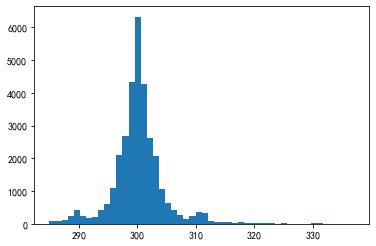

In [25]:
res = s.mask((s>s.quantile(0.99))|(s<s.quantile(0.01)))
_ = plt.hist(res, bins=50)

- 3-1

In [26]:
res = df.Radiation.rolling('6H').corr(df.Temperature)
res.tail(3)

Datetime
2016-12-31 23:45:04    0.328574
2016-12-31 23:50:03    0.261883
2016-12-31 23:55:01    0.262406
dtype: float64

- 3-2

In [27]:
res = df.Temperature.resample('6H', origin='03:00:00').mean()
res.head(3)

Datetime
2016-08-31 21:00:00    51.218750
2016-09-01 03:00:00    50.033333
2016-09-01 09:00:00    59.379310
Freq: 6H, Name: Temperature, dtype: float64

- 3-3

In [28]:
temp = pd.Series(df.index.shift(freq='-6H'), name="Datetime").to_frame()
res = pd.merge_asof(temp, df.Radiation.to_frame().reset_index(), on="Datetime", direction="nearest")
res.tail()

,Datetime,Radiation
32681,2016-12-31 17:35:02,15.96
32682,2016-12-31 17:40:01,11.98
32683,2016-12-31 17:45:04,9.33
32684,2016-12-31 17:50:03,8.49
32685,2016-12-31 17:55:01,5.84


## 二、水果销量分析

现有1份2019年每日水果销量记录表：

In [29]:
df = pd.read_csv('data/ch10/fruit.csv')
df.head(2)

,Date,Fruit,Sale
0,2019-04-18,Peach,15
1,2019-12-29,Peach,15


- 统计如下指标：
    - 每月上半月（15号及之前）与下半月葡萄销量的比值
    - 每月最后一天的生梨销量总和
    - 每月最后一天工作日的生梨销量总和
    - 每月最后五天的苹果销量均值
- 按月计算周一至周日各品种水果的平均记录条数（例如苹果在1月的4个周一记录条数分别为13、10、12和11，则其平均记录条数为11.5），行索引外层为水果名称，内层为月份，列索引为星期。
- 按天计算向前10个工作日窗口的苹果销量均值序列，非工作日的值用上一个工作日的结果填充。


```text
【解答】
```

- 1-1

In [30]:
df = pd.read_csv('data/ch10/fruit.csv')
df.Date = pd.to_datetime(df.Date)
df_grape = df.query("Fruit == 'Grape'")
res = df_grape.groupby([np.where(df_grape.Date.dt.day<=15,
                        'First', 'Second'),df_grape.Date.dt.month]
                        )['Sale'].mean().to_frame().unstack(0
                        ).droplevel(0,axis=1)
res = (res.First/res.Second).rename_axis('Month')
res.head()

Month
1    1.174998
2    0.968890
3    0.951351
4    1.020797
5    0.931061
dtype: float64

- 1-2

In [31]:
df[df.Date.dt.is_month_end].query("Fruit == 'Pear'").groupby('Date').Sale.sum().head()

Date
2019-01-31    847
2019-02-28    774
2019-03-31    761
2019-04-30    648
2019-05-31    616
Name: Sale, dtype: int64

- 1-3

In [32]:
df[df.Date.isin(pd.date_range('20190101', '20191231',
                    freq='BM'))].query("Fruit == 'Pear'"
                    ).groupby('Date').Sale.mean().head()

Date
2019-01-31    60.500000
2019-02-28    59.538462
2019-03-29    56.666667
2019-04-30    64.800000
2019-05-31    61.600000
Name: Sale, dtype: float64

- 1-4

In [33]:
target_dt = df.drop_duplicates().groupby(df.Date.drop_duplicates(
            ).dt.month)['Date'].nlargest(5).reset_index(drop=True)
res = df.set_index('Date').loc[target_dt].reset_index(
            ).query("Fruit == 'Apple'")
res = res.groupby(res.Date.dt.month)['Sale'].mean(
            ).rename_axis('Month')
res.head()

Month
1    65.313725
2    54.061538
3    59.325581
4    65.795455
5    57.465116
Name: Sale, dtype: float64

- 2

In [34]:
month_order = ['January','February','March','April',
                'May','June','July','August','September',
                'October','November','December']
week_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sum']
group1 = df.Date.dt.month_name().astype('category').cat.reorder_categories(
        month_order, ordered=True)
group2 = df.Fruit
group3 = df.Date.dt.dayofweek.replace(dict(zip(range(7),week_order))
         ).astype('category').cat.reorder_categories(
         week_order, ordered=True)
res = df.groupby([group1, group2,group3])['Sale'].count().to_frame(
         ).unstack(0).droplevel(0,axis=1)
res.head()

Date        January  February  March  April  May  June  July  August  \
Fruit Date                                                             
Apple Mon        46        43     43     47   43    40    41      38   
      Tue        50        40     44     52   46    39    50      42   
      Wed        50        47     37     43   39    39    58      43   
      Thu        45        35     31     47   58    33    52      44   
      Fri        32        33     52     31   46    38    37      48   

Date        September  October  November  December  
Fruit Date                                          
Apple Mon          59       42        39        45  
      Tue          40       57        47        47  
      Wed          35       46        47        38  
      Thu          36       63        37        40  
      Fri          34       37        46        41

- 3

In [35]:
df_apple = df[(df.Fruit=='Apple')&(
              ~df.Date.dt.dayofweek.isin([5,6]))]
s = pd.Series(df_apple.Sale.values,
              index=df_apple.Date).groupby('Date').sum()
res = s.rolling('10D').mean().reindex(
              pd.date_range('20190101','20191231')).fillna(method='ffill')
res.head()

2019-01-01    189.000000
2019-01-02    335.500000
2019-01-03    520.333333
2019-01-04    527.750000
2019-01-05    527.750000
Freq: D, dtype: float64

## 三、使用Prophet进行时序预测

Prophet是一个用于时序数据预测的工具包，它对于周期性或趋势性的时序数据具有良好的拟合预测能力，通过如下pip命令可进行安装：

```text
$ conda install -c conda-forge prophet
```

Prophet模型假设目标变量$y(t)$可以被分解为三个部分：

$$
y(t) = g(t)+s(t)+h(t)+\epsilon
$$

其中，$g(t)$为趋势函数，$s(t)$为周期函数，$h(t)$为节假日效应函数，$\epsilon$为随机误差。Prophet默认使用分段线性函数（自动检测分段点）来表示$g(t)$的部分，使用有限项傅里叶级数来表示$s(t)$部分。$h(t)$有关节假日相关的操作请读者自行在官方文档查询相关操作。

在data/ch10/prophet_ts1.csv中存放了一条时间序列的相关特征，使用matplotlib（第十一章详细介绍）进行可视化后可以发现图10.5的趋势可被分为三段，每段都以年为周期变化：

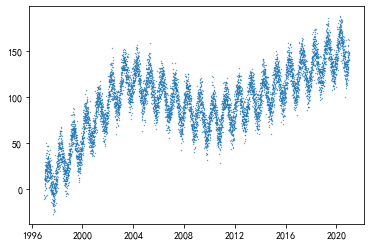

In [36]:
import matplotlib.pyplot as plt

df = pd.read_csv("data/ch10/prophet_ts1.csv", parse_dates=["ds"])
plt.scatter(df.ds, df.y, s=0.1)

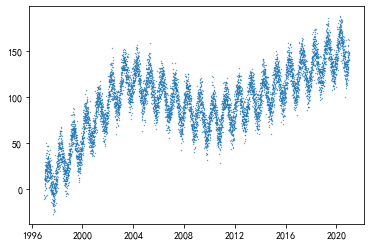

In [37]:
plt.scatter(df.ds, df.y, s=0.1)
plt.savefig("_static/ch10/10-5.svg")

```{figure} ../source/_static/ch10/10-5.svg
---
width: 400px
align: center
---
图10.5 prophet_ts1数据的时序趋势
```




此时，可以用Prophet进行以年（365天）为周期的模型拟合：

In [38]:
from prophet import Prophet

# 关闭所有预设的周期
model = Prophet(
    weekly_seasonality=False,
    yearly_seasonality=False,
    daily_seasonality=False,
    # 模型可以自动检测分段点，也可以手动添加
    # changepoints=['2003-07-29', "2010-02-22"],
)
# 人工添加365天的年周期，fourier_order表示傅里叶级数的阶数，参数可调节
# 此外，可以添加多种周期性，例如先添加365的年周期，再添加7的周周期
# 此时s(t) = s_{year}(t) + s_{week}(t)
model.add_seasonality(name='year_change', period=365, fourier_order=3)
model.fit(df)

Importing plotly failed. Interactive plots will not work.


C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


接着，使用模型对后续四年的情况进行预测：

In [39]:
future = model.make_future_dataframe(periods=365*4)
res = model.predict(future)[['ds', 'yhat']]

C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


用红色表示对过去的拟合曲线，用蓝色表示对未来的预测曲线进行绘制，结果如图10.6所示：

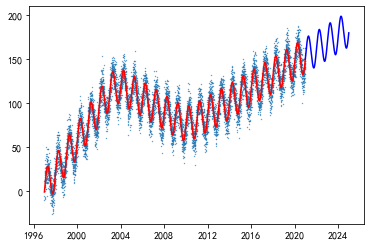

In [40]:
plt.scatter(df.ds, df.y, s=0.1)
plt.plot(res.ds[:df.shape[0]], res.yhat[:df.shape[0]], c="Red")
plt.plot(res.ds[df.shape[0]:], res.yhat[df.shape[0]:], c="Blue")

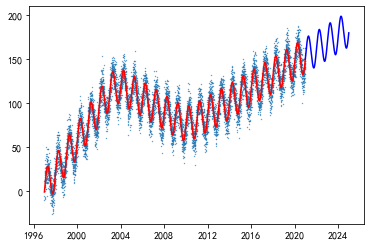

In [41]:
plt.scatter(df.ds, df.y, s=0.1)
plt.plot(res.ds[:df.shape[0]], res.yhat[:df.shape[0]], c="Red")
plt.plot(res.ds[df.shape[0]:], res.yhat[df.shape[0]:], c="Blue")
plt.savefig("_static/ch10/10-6.svg")

```{figure} ../source/_static/ch10/10-6.svg
---
width: 400px
align: center
---
图10.6 prophet_ts1数据的拟合和预测结果
```

但有些时候数据特征的周期振幅会随着时间变化，例如在data/ch10/prophet_ts2.csv中，越靠后的年份波动性越强，可视化情况如图10.7所示。

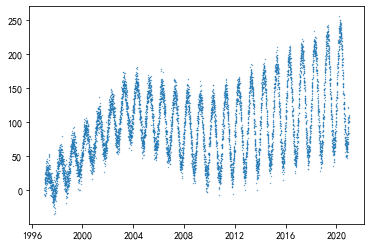

In [42]:
df = pd.read_csv("data/ch10/prophet_ts2.csv", parse_dates=["ds"])
plt.scatter(df.ds, df.y, s=0.1)

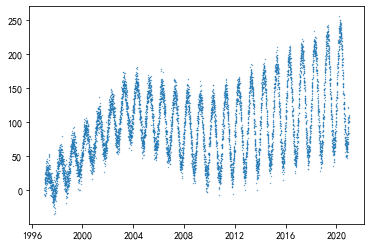

In [43]:
plt.scatter(df.ds, df.y, s=0.1)
plt.savefig("_static/ch10/10-7.svg")

```{figure} ../source/_static/ch10/10-7.svg
---
width: 400px
align: center
---
图10.7 prophet_ts2数据的时序趋势
```

默认情况下Prophet使用加法模型，即seasonality_mode参数为“additive”，此时可以将其更改为“multiplicative”，表示乘法模型，即

$$
y(t) = g(t)+g(t)*s(t)+h(t)+\epsilon
$$

此时，仿照上述过程进行拟合，对结果仍然用蓝色和红色区分未来预测和历史拟合，可视化效果如图10.8所示：

C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


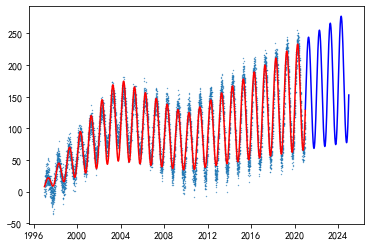

In [44]:
model = Prophet(
    weekly_seasonality=False,
    yearly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="multiplicative"
)
model.add_seasonality(name='year_change', period=365, fourier_order=3)
model.fit(df)
future = model.make_future_dataframe(periods=365*4)
res = model.predict(future)[['ds', 'yhat']]
plt.scatter(df.ds, df.y, s=0.1)
plt.plot(res.ds[:df.shape[0]], res.yhat[:df.shape[0]], c="Red")
plt.plot(res.ds[df.shape[0]:], res.yhat[df.shape[0]:], c="Blue")

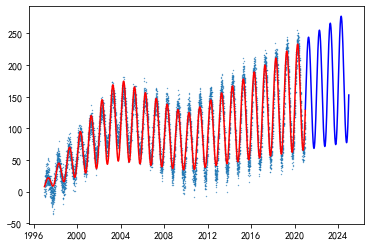

In [45]:
plt.scatter(df.ds, df.y, s=0.1)
plt.plot(res.ds[:df.shape[0]], res.yhat[:df.shape[0]], c="Red")
plt.plot(res.ds[df.shape[0]:], res.yhat[df.shape[0]:], c="Blue")
plt.savefig("_static/ch10/10-8.svg")

```{figure} ../source/_static/ch10/10-8.svg
---
width: 400px
align: center
---
图10.8 prophet_ts2数据的拟合和预测结果
```

在data/ch10/prophet_data.csv中存放了8组从1985年1月至2017年12月的时序特征，完成以下任务：

- 以1985年1月至2014年12月为训练集，以2015年1月至2017年12月为验证集，以均方误差（MSE）为评价指标，分别对8组特征选择对应的模型最优参数，可调节的参数包括但不限于分割点changepoints、模型形式seasonality_mode以及通过add_seasonality添加的潜在周期模式。
- 分别对8组时序特征进行预测，预测范围为2018年1月至2021年12月。

```text
【解答】
```

此处仅演示Sequence_1+调节fourier_order参数，其余类似：

- 1

In [46]:
df = pd.read_csv("data/ch10/prophet_data.csv")
df_seq = df.iloc[:, [0]].copy().rename(columns={"Sequence_1":"y"})
df_seq["ds"] = pd.date_range("19850101", "20171231", freq="M")
df_seq = df_seq[["ds", "y"]]

In [47]:
def get_order():
    min_mse = float("inf")
    order_list = [3,5,8]
    final_order = None
    for order in order_list:
        model = Prophet(
            weekly_seasonality=False,
            yearly_seasonality=False,
            daily_seasonality=False,
        )
        model.add_seasonality(
            name='year_change', period=365, fourier_order=order)
        model.fit(df_seq.iloc[:-36])
        predict = model.predict(df_seq.ds.iloc[-36:].to_frame()).yhat
        mse = ((df_seq.y.iloc[-36:].reset_index(drop=True) - predict) ** 2).mean()
        if mse < min_mse:
            final_order = order
            min_mse = mse
    return final_order

In [48]:
model = Prophet(
    weekly_seasonality=False,
    yearly_seasonality=False,
    daily_seasonality=False,
)
model.add_seasonality(name='year_change', period=365, fourier_order=get_order())
model.fit(df_seq)

C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


- 2

C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\gyh\miniconda3\envs\final\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


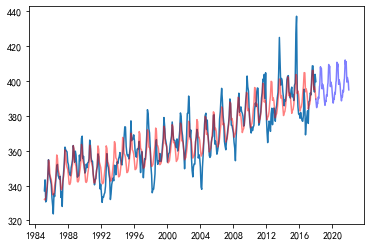

In [49]:
future = model.make_future_dataframe(periods=365*4)
res = model.predict(future)[['ds', 'yhat']]
plt.plot(df_seq.ds, df.iloc[:,0])
plt.plot(res.ds[:df.shape[0]], res.yhat[:df.shape[0]], c="Red", alpha=0.5)
plt.plot(res.ds[df.shape[0]:], res.yhat[df.shape[0]:], c="Blue", alpha=0.5)